In [1]:
import os
os.getcwd()
os.chdir('/Users/masakieguchi/Dropbox/0_Projects/0_basenlp/SFLAnalyzer/Engagement_span_finder')

In [2]:
import spacy
import json
import pprint as pp

from spacy.training import Corpus, Example
from spacy.tokens import Doc
from spacy.cli._util import app, Arg, Opt, setup_gpu, import_code
from spacy.scorer import Scorer
from spacy import util
from spacy import displacy

from scripts.aligner import needle


from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

categories = [
    'ENTERTAIN', "ATTRIBUTE", "ENDORSE", "PRONOUNCE", "CONCUR", "COUNTER",
    "DENY", "MONOGLOSS", "CITATION", "SOURCES", "ENDOPHORIC", "EXEMPLIFYING",
    "EXPOSITORY", "JUSTIFYING", "SUMMATIVE", "COMPARATIVE", "TEXT_SEQUENCING",
    "GOAL_ANNOUNCING", "_"
]

getter = getattr


In [3]:
code_path = './scripts/custom_functions.py'
import_code(code_path)
getter = getattr

data_path = "data/engagement_spl_dev.spacy"

model = 'packages/en_engagement_spl_RoBERTa_acad_max1_do02_sq_lw-0.2.6.1130/en_engagement_spl_RoBERTa_acad_max1_do02_sq_lw/en_engagement_spl_RoBERTa_acad_max1_do02_sq_lw-0.2.6.1130'


In [4]:


corpus = Corpus(data_path, gold_preproc=False)
nlp = util.load_model(model)
nlp = spacy.load(model)
dev_dataset = list(corpus(nlp))

# Creating both gold-standard and predicted data

In [5]:
def dataset2tags(dev_dataset_sub):
    gold_doc = dev_dataset_sub.reference
    pred_doc = nlp(dev_dataset_sub.text)
    ents_x2y = dev_dataset_sub.get_aligned_spans_x2y(pred_doc.spans['sc'])

    #start a set
    gold_spans = set()
    pred_spans = set()



    for span in gold_doc.spans['sc']:
        gold_span = (span.label_, span.start, span.end - 1)
        gold_spans.add(gold_span)

    # for span in pred_doc.spans['sc']:
    #     pred_span = (span.label_, span.start, span.end - 1)
    #     pred_spans.add(pred_span)
    for span in ents_x2y:
        pred_span = (span.label_, span.start, span.end - 1)
        pred_spans.add(pred_span)

    alined = needle(sorted(gold_spans), sorted(pred_spans))

    y_gold = [y[0] for y in alined[-2]]
    y_pred = [y[0] for y in alined[-1]]
    return (y_gold, y_pred)


In [6]:
gold_tags = []
pred_tags = []

for data in dev_dataset:
    gold, pred = dataset2tags(data)
    assert len(gold) == len(pred)
    gold_tags.extend(gold)
    pred_tags.extend(pred)


/Users/masakieguchi/opt/miniforge3/envs/spacy-exp/lib/python3.9/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


ZeroDivisionError: float division by zero

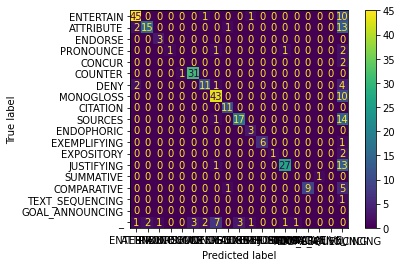

In [7]:
cm = confusion_matrix(gold_tags, pred_tags, labels=categories)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=categories,
)



disp.plot(xticks_rotation='horizontal')
plt.show()

ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (19).

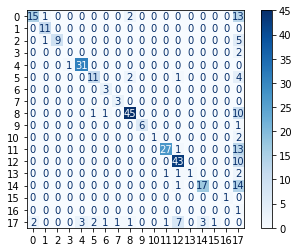

In [9]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=gold_tags,
                                               y_pred=pred_tags,
                                               display_labels=categories,
                                               xticks_rotation=45,
                                               cmap=plt.cm.Blues)

plt.show()
